### Analyse De Corrélation :


In [3]:

# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read the file
df = pd.read_csv('../data.csv', encoding='latin1')
# print(df.head())
print(df)


                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

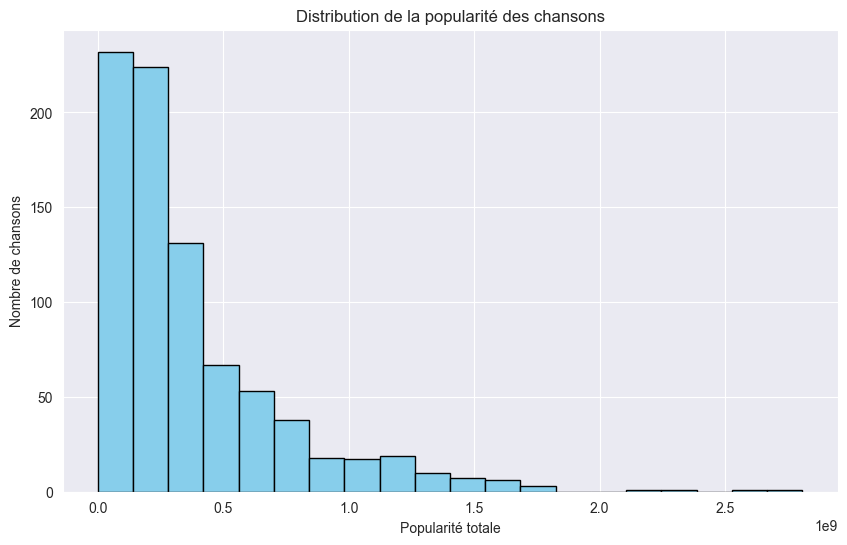

In [5]:
columns_to_convert = ['in_spotify_playlists', 'in_spotify_charts', 'streams',
                    'in_apple_playlists', 'in_apple_charts',
                    'in_deezer_playlists', 'in_deezer_charts',
                    'in_shazam_charts']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convertir les valeurs non numériques en NaN

# Supprimer les lignes avec des valeurs NaN
df.dropna(subset=columns_to_convert, inplace=True)

# Agréger les mesures de popularité pour chaque chanson
df['total_popularity'] = df[columns_to_convert].sum(axis=1)

# Créer un histogramme de la popularité des chansons
plt.figure(figsize=(10, 6))
plt.hist(df['total_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularité totale')
plt.ylabel('Nombre de chansons')
plt.title('Distribution de la popularité des chansons')
plt.grid(True)
plt.show()

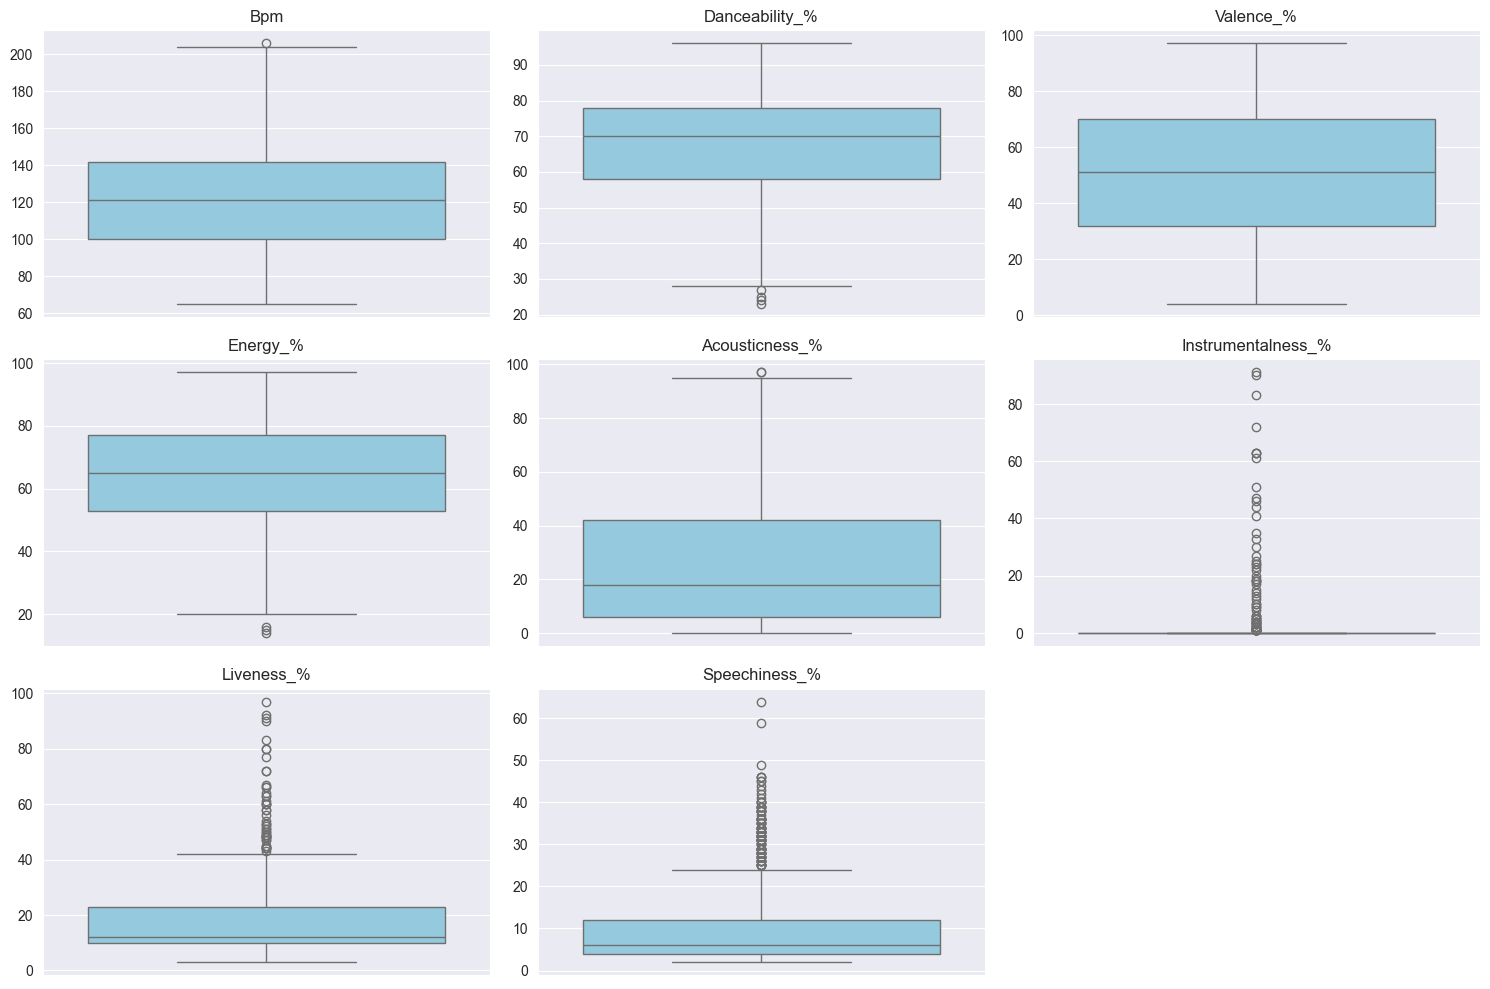

Chansons avec une popularité très élevée :
                                            track_name  \
22                                    I Wanna Be Yours   
37                                         Blank Space   
41       Sunflower - Spider-Man: Into the Spider-Verse   
47                                         Die For You   
57                                          La Bachata   
74               Quevedo: Bzrp Music Sessions, Vol. 52   
77                           Unholy (feat. Kim Petras)   
84                           STAY (with Justin Bieber)   
87                                     Me Porto Bonito   
115                                     No Role Modelz   
134                                                505   
152                                       Danza Kuduro   
154                               Locked Out Of Heaven   
164                                    Save Your Tears   
166            Every Breath You Take - Remastered 2003   
167                          

In [6]:
# Distribution des features
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(feature.capitalize())
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Identifier les chansons avec une popularité très élevée ou très basse
high_popularity_threshold = df['total_popularity'].quantile(0.95)
low_popularity_threshold = df['total_popularity'].quantile(0.05)

high_popularity_songs = df[df['total_popularity'] >= high_popularity_threshold]
low_popularity_songs = df[df['total_popularity'] <= low_popularity_threshold]

print("Chansons avec une popularité très élevée :")
print(high_popularity_songs[['track_name', 'artist(s)_name', 'total_popularity']])

print("\nChansons avec une popularité très basse :")
print(low_popularity_songs[['track_name', 'artist(s)_name', 'total_popularity']])